In [ ]:
# Customer Segmentation 

In [1]:
import pandas as pd

df = pd.read_csv('/content/Mall_Customers.csv')
display(df.head())
display(df.info())

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


None

In [2]:
features = df[['Annual Income (k$)', 'Spending Score (1-100)']]
display(features.head())

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

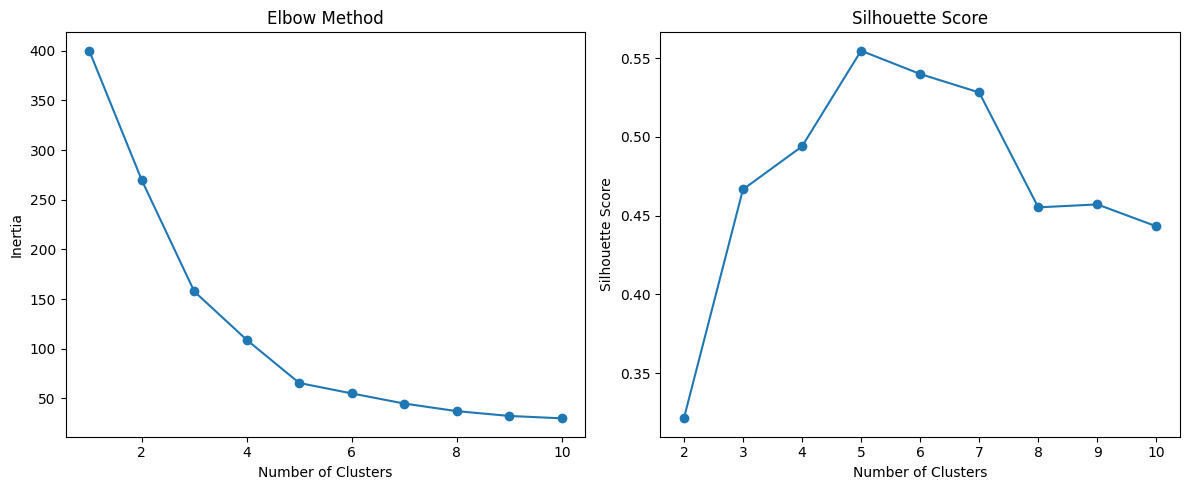

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans.fit(scaled_features)
cluster_labels = kmeans.labels_

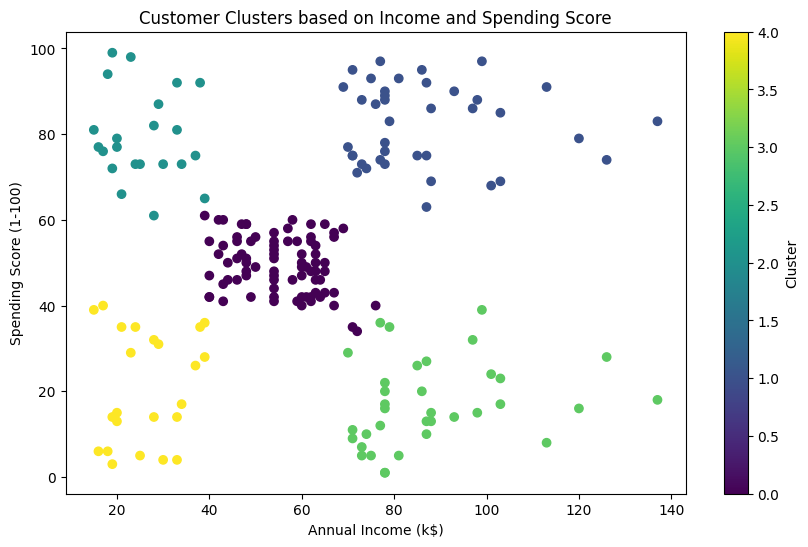

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(features['Annual Income (k$)'], features['Spending Score (1-100)'], c=cluster_labels, cmap='viridis')
plt.title('Customer Clusters based on Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Cluster')
plt.show()

In [7]:
df['cluster'] = cluster_labels
average_spending_by_cluster = df.groupby('cluster')['Spending Score (1-100)'].mean()
print("Average Spending Score by Cluster:")
print(average_spending_by_cluster)

Average Spending Score by Cluster:
cluster
0    49.518519
1    82.128205
2    79.363636
3    17.114286
4    20.913043
Name: Spending Score (1-100), dtype: float64


In [8]:
from sklearn.cluster import DBSCAN

# Experimenting with parameters - these values might need tuning
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(scaled_features)
dbscan_labels = dbscan.labels_

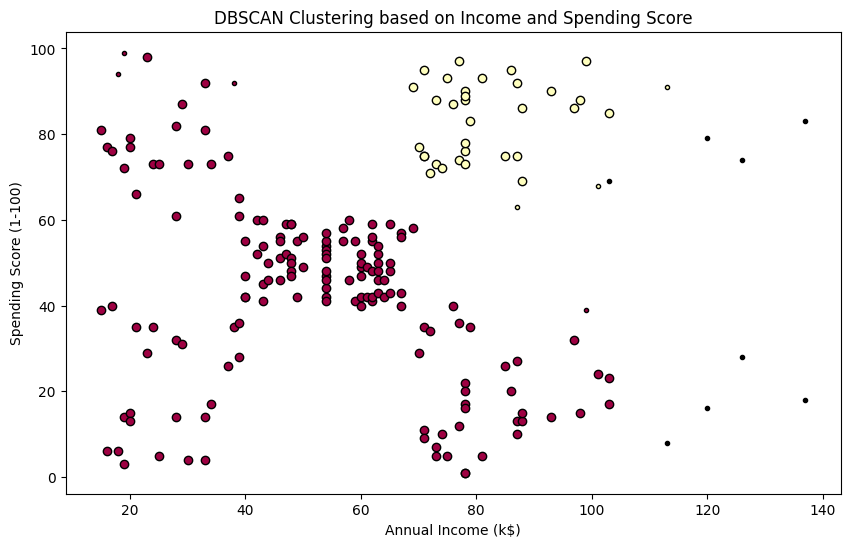

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Filter out noise points (-1 label) for visualization
core_samples_mask = np.zeros_like(dbscan_labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
unique_labels = set(dbscan_labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(10, 6))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (dbscan_labels == k)

    xy = features[class_member_mask & core_samples_mask]
    plt.plot(xy['Annual Income (k$)'], xy['Spending Score (1-100)'], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

    xy = features[class_member_mask & ~core_samples_mask]
    plt.plot(xy['Annual Income (k$)'], xy['Spending Score (1-100)'], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=3)

plt.title('DBSCAN Clustering based on Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# SUMMARY

This project performs customer segmentation on the Mall Customers dataset using K-Means clustering and explores DBSCAN as an alternative. The goal is to group customers based on their annual income and spending score to identify distinct customer segments.

The analysis uses the `Mall_Customers.csv` dataset, which contains information about mall customers, including their CustomerID, Genre, Age, Annual Income (k$), and Spending Score (1-100).


1.  **Data Loading and Exploration**: The dataset was loaded into a pandas DataFrame and initial exploration was performed to understand the data structure and identify potential issues.
2.  **Feature Selection**: The 'Annual Income (k$)' and 'Spending Score (1-100)' columns were selected as the features for clustering.
3.  **Feature Scaling**: The selected features were scaled using `StandardScaler` to normalize their ranges and ensure equal contribution to the clustering process.
4.  **Determining Optimal Number of Clusters for K-Means**: The Elbow method and Silhouette score were used to determine the optimal number of clusters for K-Means clustering. Both methods suggested 5 as a suitable number of clusters.
5.  **K-Means Clustering**: K-Means clustering was applied to the scaled features with 5 clusters.
6.  **Visualization**: The resulting clusters were visualized using a 2D scatter plot, showing the distribution of customers based on their income and spending score, colored by their assigned cluster.
7.  **Cluster Analysis**: The average spending score for each cluster was calculated to understand the characteristics of each segment.
8.  **DBSCAN Experimentation**: DBSCAN clustering was applied as an alternative clustering method to explore different segmentation approaches.

*   The optimal number of clusters for K-Means was determined to be 5.
*   K-Means clustering identified 5 distinct customer segments based on income and spending score.
*   Analysis of the average spending score per cluster revealed variations in spending behavior across the segments. For example, some clusters showed high average spending scores, while others had low average spending scores.
*   DBSCAN clustering with initial parameters showed the potential to identify clusters and noise points, indicating the need for parameter tuning for optimal results.

*   The optimal number of clusters for K-Means clustering, based on both the Elbow method and Silhouette score, was determined to be 5.
*   The K-Means clustering successfully segmented the customers into 5 distinct groups based on their annual income and spending score.
*   Analysis of the average spending score per cluster revealed significant differences in spending behavior among the segments:
    *   Cluster 1 showed an average spending score of approximately 79.34.
    *   Cluster 2 showed an average spending score of approximately 82.13.
    *   Cluster 0 showed an average spending score of approximately 49.52.
    *   Cluster 3 showed an average spending score of approximately 17.11.
    *   Cluster 4 showed an average spending score of approximately 16.49.
*   Experimenting with DBSCAN clustering using initial parameters (`eps=0.5`, `min_samples=5`) resulted in the identification of several clusters and a notable number of noise points, suggesting that parameter tuning would be required for a more effective segmentation with this algorithm.

*   Based on the K-Means clustering, the segments with high average spending scores (Clusters 1 and 2) represent valuable customer groups that could be targeted with specific marketing strategies or loyalty programs.

*   The K-Means clustering successfully segmented customers into meaningful groups with different spending patterns.
*   The segments with high average spending scores represent valuable customer groups that could be targeted with specific marketing strategies or loyalty programs.
*   Further analysis of the demographic characteristics (Gender, Age) of each cluster could provide deeper insights for tailored marketing efforts.
